### **AGE AND GENDER PREDICTION USING DEEP LEARNING ⚙️**

#### KUSH OZA
#### D2 42
#### DL LAB PROJECT

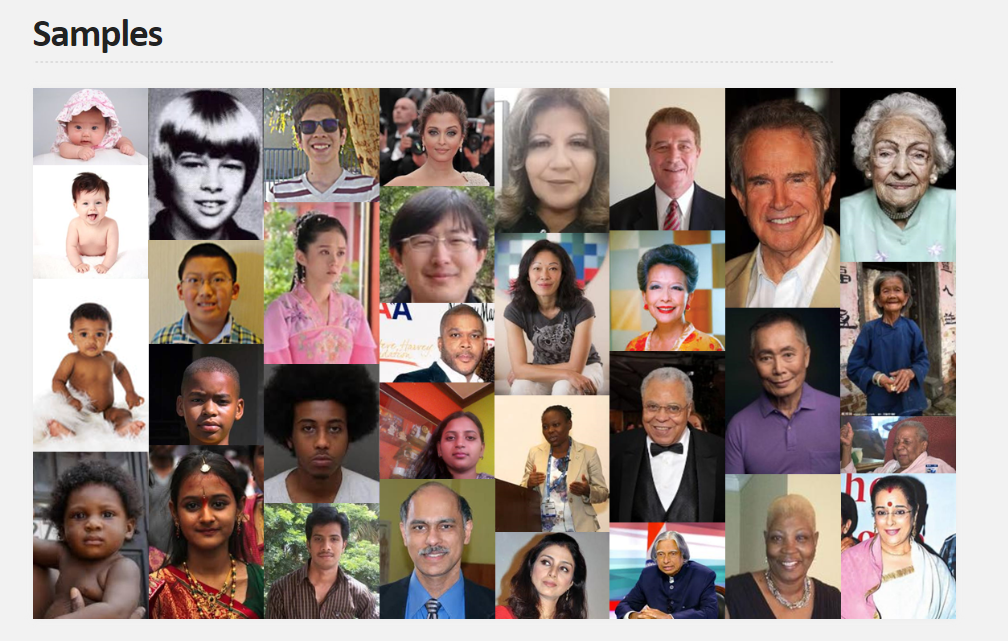

In [4]:
# General
import os
import keras
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.data as tfds
from sklearn.model_selection import train_test_split
from keras.applications import ResNet152V2

In [5]:
np.random.seed(42)
tf.random.set_seed(42)
BATCH_SIZE = 32
IMAGE_SIZE = 224

### **PERFORMING DATA ANALYSIS ON DATASET**

In [8]:
import random

Total number of images:  7112
Sample Image path:  26_1_4_20170117174527047.jpg.chip.jpg
Sample Age: 26
Sample Gender:  Female


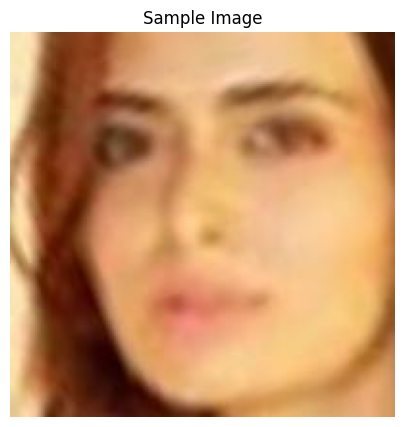

In [22]:

# Initialize the directory path
dir_path = "/kaggle/input/utkface-new/UTKFace/"
image_paths = os.listdir(dir_path)

# Calculate the number of images to select (30% of total)
num_images_to_select = int(0.3 * len(image_paths))

# Randomly select 30% of the images
selected_image_paths = random.sample(image_paths, num_images_to_select)

# Now, selected_image_paths contains paths to 30% of the images in dir_path


# Initialize a Gender Mapping
gender_mapping = ["Male", "Female"]

# Choose and load an image randomly
rand_image_path = np.random.choice(selected_image_paths)
rand_image = plt.imread(dir_path + rand_image_path)
sample_age, sample_gender, *_ = rand_image_path.split("_")

print("Total number of images: ",len(selected_image_paths))
print("Sample Image path: ",rand_image_path)
print("Sample Age:", sample_age)
print("Sample Gender: ",gender_mapping[int(sample_gender)])

plt.figure(figsize = (5,5))
plt.title("Sample Image")
plt.imshow(rand_image)
plt.axis("off")
plt.show()

Handling **23,708 images** necessitates **memory-efficient strategies** like **batching or utilizing image generators** to **avoid overwhelming memory constraints**. Moreover, the structure of the image path, **delineating age and gender**—where the **first part signifies age** and the **second denotes gender** (**0 for male**, **1 for female**)—provides **crucial information** for subsequent **analysis and categorization**.

Careful management of these paths will facilitate targeted data processing based on **age and gender attributes.**

In [23]:
# Initialize a male counter.
male_count = 0
ages = []

# Male counts
for path in selected_image_paths:
    path_split = path.split("_")
    if "0" == path_split[1]:
        male_count += 1
    ages.append(int(path_split[0]))

# Count total female counts
female_count = len(selected_image_paths) - male_count



In [25]:
import seaborn as sns

/tmp/ipykernel_34/2794015913.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ages)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

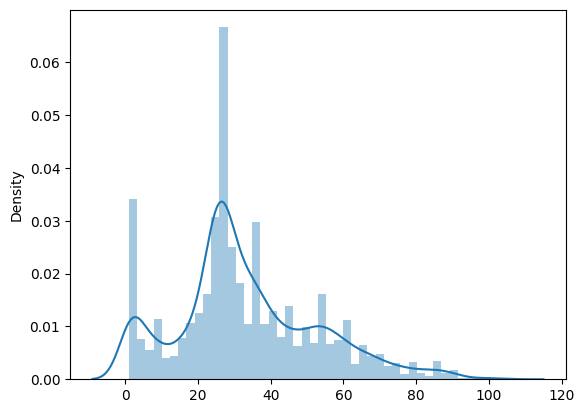

In [26]:
sns.distplot(ages)

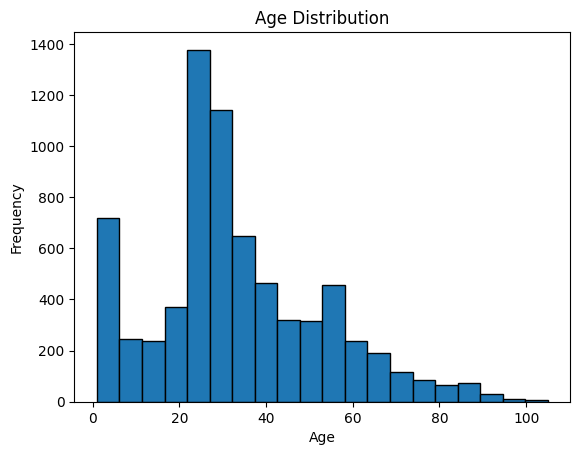

In [27]:
# Histogram of age
plt.hist(ages, bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

In [29]:
import plotly.express as px
pie_chart = px.pie(
    names = gender_mapping,
    values = [male_count, female_count],
    title = "Gender Distribution Donut Chart",
    height = 500
)
pie_chart.show()

In [30]:
# SHuffling the Images
np.random.shuffle(selected_image_paths)

# Split data into training, testing and validation set
train_images, test_images = train_test_split(
    selected_image_paths,
    train_size = 0.9,
    test_size = 0.1
)

train_images, valid_images = train_test_split(
    selected_image_paths,
    train_size = 0.9,
    test_size = 0.1
)

In [31]:
print(f"Training Size : {len(train_images)}")
print(f"Testing Size  : {len(test_images)}")

Training Size : 6400
Testing Size  : 712


In [32]:
train_ages = [int(path.split("_")[0]) for path in train_images]
train_genders = [int(path.split("_")[1]) for path in train_images]

In [33]:
valid_ages = [int(path.split("_")[0]) for path in valid_images]
valid_genders = [int(path.split("_")[1]) for path in valid_images]

In [35]:
test_ages = [int(path.split("_")[0]) for path in test_images]
test_genders = [int(path.split("_")[1]) for path in test_images]

Because we have a **huge number of images**, it will be better to use **Tensorflow data set** for **efficient processing**.

In [36]:
def preprocess_gender_data(selected_image_path, age, gender, dir_path=dir_path, IMAGE_SIZE = IMAGE_SIZE):
    image = tf.io.read_file(dir_path + selected_image_path)
    image = tf.io.decode_jpeg(image)
    image = tf.image.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
    image = image / 255
    image = tf.cast(image, tf.float32)

    return image, gender

In [37]:
# Obtain training, testing and validation datasets
train_ds = tfds.Dataset.from_tensor_slices((train_images, train_ages, train_genders)).shuffle(2000)
train_gender_ds = train_ds.map(preprocess_gender_data, num_parallel_calls=BATCH_SIZE).batch(BATCH_SIZE).prefetch(tfds.AUTOTUNE)

In [38]:
valid_ds = tfds.Dataset.from_tensor_slices((valid_images, valid_ages, valid_genders)).shuffle(2000)
valid_gender_ds = valid_ds.map(preprocess_gender_data, num_parallel_calls=BATCH_SIZE).batch(BATCH_SIZE).prefetch(tfds.AUTOTUNE)

In [40]:
test_ds  = tfds.Dataset.from_tensor_slices((test_images, test_ages, test_genders)).shuffle(500)
test_gender_ds = test_ds.map(preprocess_gender_data, num_parallel_calls=BATCH_SIZE).batch(BATCH_SIZE).prefetch(tfds.AUTOTUNE)

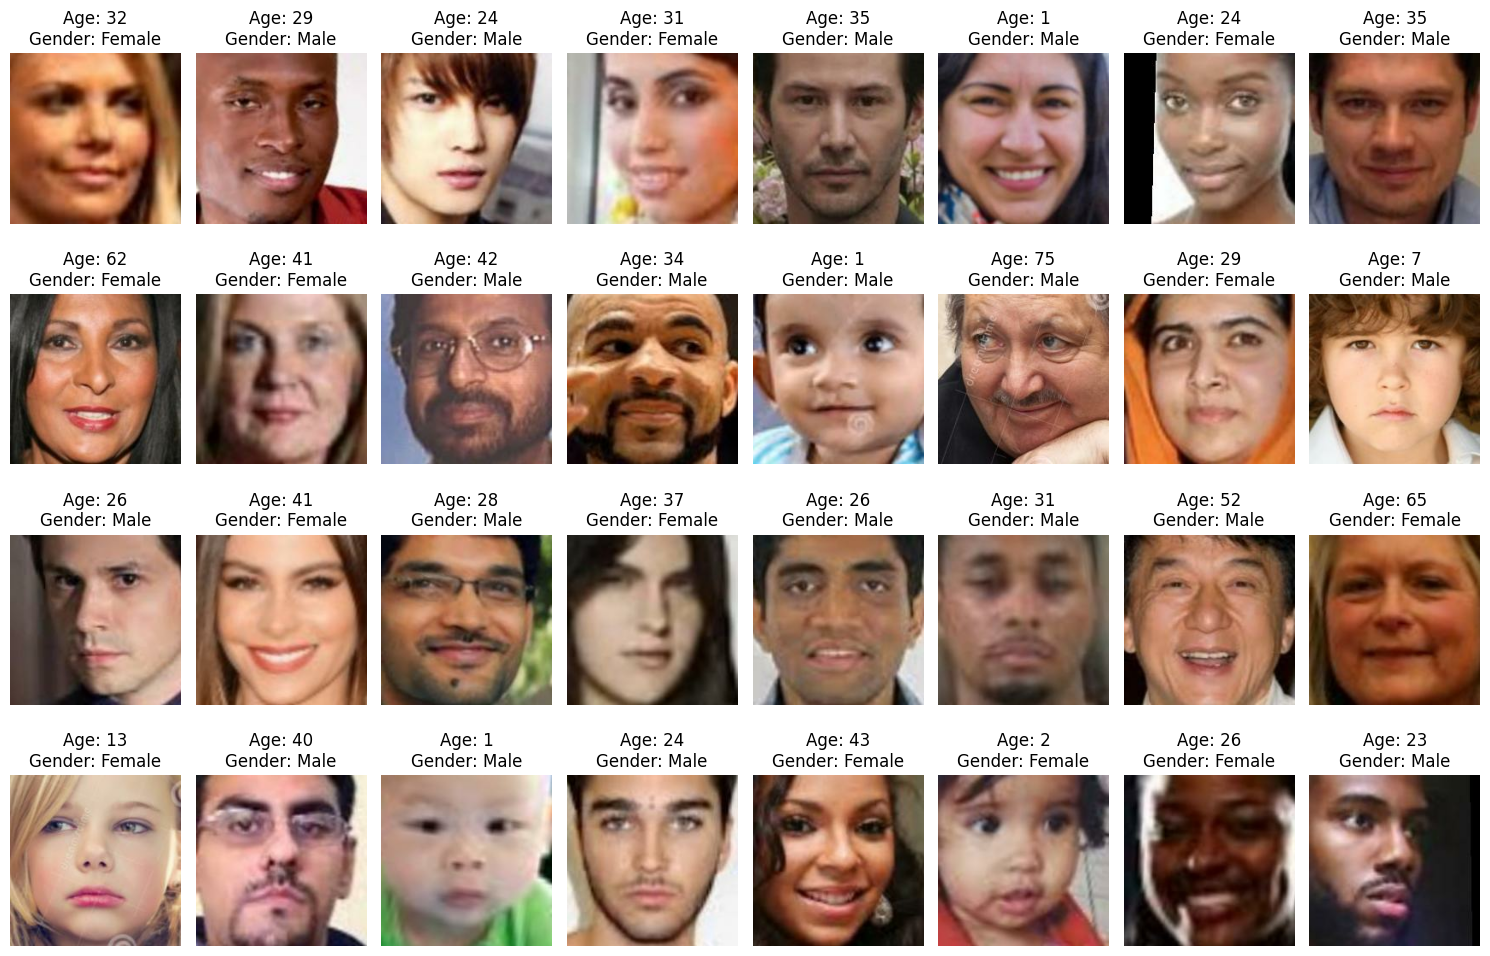

In [41]:
plt.figure(figsize=(15, 10))
for images, ages, genders in train_ds.batch(BATCH_SIZE).take(5):

    for index in range(len(images)):
        image = tf.io.read_file(dir_path + images[index])
        image = tf.io.decode_jpeg(image)
        plt.subplot(4, 8, index + 1)
        plt.imshow(image)
        plt.title(f"Age: {ages[index]}\nGender: {gender_mapping[genders[index]]}")
        plt.axis("off")

plt.tight_layout()
plt.show()

**Successfully preprocessed our dataset**

# **Implementing ResNet For Gender Classification**

In [2]:
from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import GlobalAveragePooling2D
from keras.layers import InputLayer

In [21]:
# Initializing the backbone layer
resnet = ResNet152V2(input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3), include_top = False, weights="imagenet")

# Freeze the backbone weights
resnet.trainable = False

# Creating a gender model
gender_net = Sequential([
    InputLayer((IMAGE_SIZE, IMAGE_SIZE, 3), name="ImageInput"),
    resnet,
    Dropout(0.2, name = "SlightDroput"),
    GlobalAveragePooling2D(name="GlobalAvgPooling"),
    Dense(1, activation="sigmoid", name="gender")
], name="GenderNet")

gender_net.compile(
    loss = "binary_crossentropy",
    optimizer = 'adam',
    metrics = ['accuracy'],
    weighted_metrics=[]
)

234545216/234545216 [==============================] - 1s 0us/step


In [26]:
# Training the Gender Model
gender_history = gender_net.fit(
    train_gender_ds,
    validation_data = valid_gender_ds,
    epochs = 50,
    batch_size = BATCH_SIZE
)

Epoch 1/50
200/200 [==============================] - 28s 139ms/step - loss: 0.2517 - accuracy: 0.8981 - val_loss: 0.3397 - val_accuracy: 0.8610
Epoch 2/50
200/200 [==============================] - 28s 139ms/step - loss: 0.2479 - accuracy: 0.8972 - val_loss: 0.3388 - val_accuracy: 0.8596
Epoch 3/50
200/200 [==============================] - 28s 140ms/step - loss: 0.2453 - accuracy: 0.9011 - val_loss: 0.3356 - val_accuracy: 0.8497
Epoch 4/50
200/200 [==============================] - 28s 139ms/step - loss: 0.2455 - accuracy: 0.9005 - val_loss: 0.3329 - val_accuracy: 0.8680
Epoch 5/50
200/200 [==============================] - 28s 139ms/step - loss: 0.2386 - accuracy: 0.9059 - val_loss: 0.3353 - val_accuracy: 0.8497
Epoch 6/50
200/200 [==============================] - 28s 139ms/step - loss: 0.2382 - accuracy: 0.9075 - val_loss: 0.3345 - val_accuracy: 0.8624
Epoch 7/50
200/200 [==============================] - 28s 139ms/step - loss: 0.2363 - accuracy: 0.9059 - val_loss: 0.3391 - val_ac

Having completed the training for both the Age Model and Gender Model, it is crucial to assess their learning curves for a comprehensive evaluation.

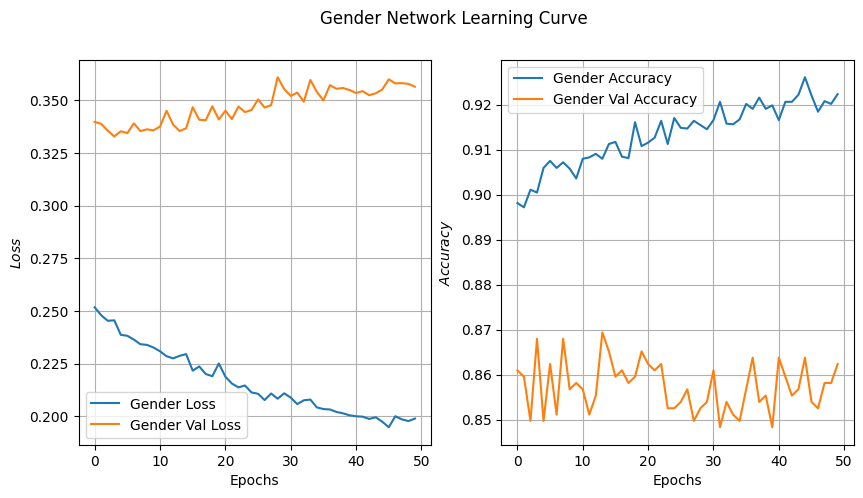

In [111]:
# Converting history into data frame.
gender_his_df = pd.DataFrame(gender_history.history)

# Visualization
plt.figure(figsize=(10, 5 ))
plt.subplot(1,2,1)
plt.suptitle("Gender Network Learning Curve")
plt.plot(gender_his_df['loss'], label="Gender Loss")
plt.plot(gender_his_df['val_loss'], label="Gender Val Loss")
plt.xlabel("Epochs")
plt.ylabel("$Loss$")
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(gender_his_df['accuracy'], label="Gender Accuracy")
plt.plot(gender_his_df['val_accuracy'], label="Gender Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("$Accuracy$")
plt.grid()
plt.legend()

plt.show()

In [110]:
gender_his_df.tail()

loss  accuracy  val_loss  val_accuracy
45  0.194742  0.922031  0.359990      0.853933
46  0.199954  0.918437  0.358077      0.852528
47  0.198490  0.920781  0.358164      0.858146
48  0.197660  0.920156  0.357812      0.858146
49  0.198856  0.922344  0.356504      0.862360

# **Model Predictions**

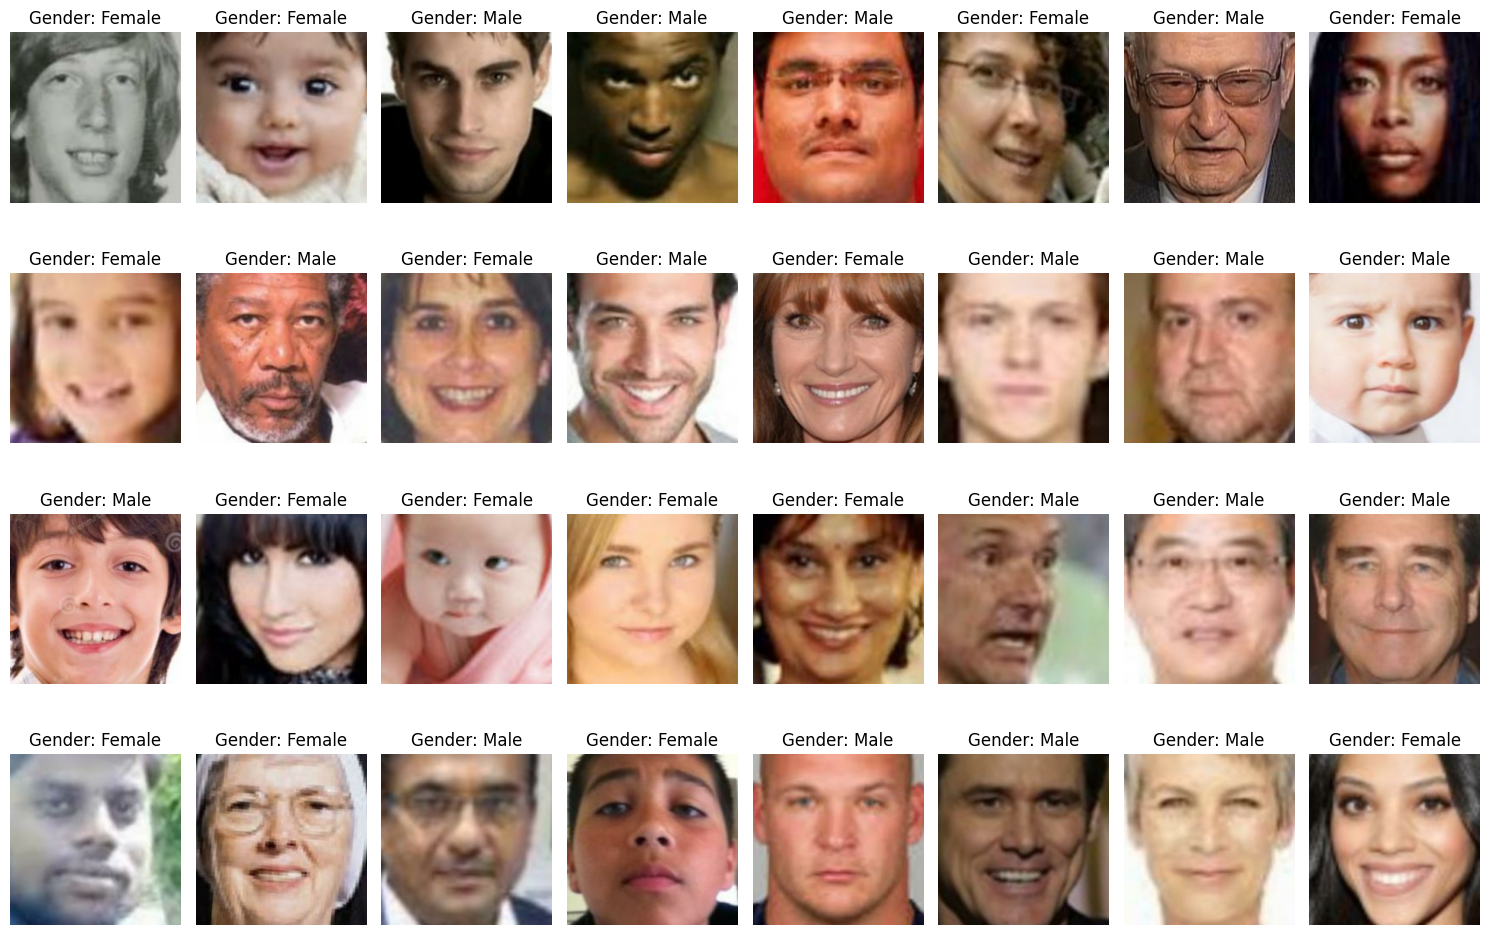

In [32]:
plt.figure(figsize=(15, 10))
for images, ages, genders in test_ds.batch(BATCH_SIZE).take(4):
    for index in range(len(images)):

        # Image Processing
        image = tf.io.read_file(dir_path + images[index])
        image = tf.io.decode_jpeg(image)
        image = tf.cast(image, tf.float32)
        image = image/255.
        image = tf.image.resize(image, [224,224])
        image = tf.reshape(image, [-1,224,224,3])
        
        # Predictions
        pred_gender = tf.round(tf.squeeze(gender_net.predict(image, verbose=0)))

        # Visualization
        plt.subplot(4, 8, index + 1)
        plt.imshow(image[0])
        plt.title(f"Gender: {gender_mapping[int(pred_gender)]}")
        plt.axis("off")

plt.tight_layout()
plt.show()